## Exploring Fake and Real News CSV files

In [1]:
# Add installations as needed
# !pip install pandas
# !pip install sklearn
# !pip install sqlalchemy0
# !pip install psycopg2
# !pip install psycopg2-binary

#### Fake News Detection Datasets from University of Victoria Engineering  
https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php

Datasets available include one CSV file of truthful articles from reliable news sites and another CSV file with articles from sites flagged as unreliable by https://www.politifact.com/

### Reading in the CSV files as dataframes

In [2]:
# Set up dependencies and read in csv files
import os
import pandas as pd
from sqlalchemy import create_engine

In [3]:
fake_news_path = os.path.join("Data", "fake.csv")
fake_news_path

'Data\\fake.csv'

In [4]:
fake_df = pd.read_csv(fake_news_path)
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
true_path = os.path.join("Data", "true.csv")
true_path

'Data\\true.csv'

In [6]:
true_df = pd.read_csv(true_path)
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


### Prepare dataframes for train_test_split and models
* Insert a column for each dataframe identifying if fake or real news
* Insert a coded column, with 0 values for fake news and 1 values for real news
* Combine the two dataframes to one, for train_test_split

In [7]:
fake_df.insert(0, 'news_type', 'fake')
fake_df

,news_type,title,text,subject,date
0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...
23476,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
fake_df.insert(0, 'type', '0')
fake_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
23476,0,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,0,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,0,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,0,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
# View example of title and text
fake_df.loc[2,'title']

' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’'

In [10]:
fake_df.loc[2,'text']

'On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discredi

In [11]:
true_df.insert(0, 'news_type', 'true')
true_df

,news_type,title,text,subject,date
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...,...
21412,true,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,true,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,true,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,true,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [12]:
true_df.insert(0, 'type', '1')
true_df

,type,news_type,title,text,subject,date
0,1,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,1,true,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


### Data Cleaning

In [13]:
# Break the text column into two, adding new column to only view what was after the hyphen
true_df['text_split'] = true_df['text'].str.split(' - ', expand=False).str[1]
true_df
# using '-' also split anywhere there was a hyphen which was not intended

,type,news_type,title,text,subject,date,text_split
0,1,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",The head of a conservative Republican faction ...
1,1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Transgender people will be allowed for the fir...
2,1,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",The special counsel investigation of links bet...
3,1,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Trump campaign adviser George Papadopoulos tol...
4,1,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",President Donald Trump called on the U.S. Post...
...,...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",NATO allies on Tuesday welcomed President Dona...
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017","LexisNexis, a provider of legal, regulatory an..."
21414,1,true,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",In the shadow of disused Soviet-era factories ...
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Vatican Secretary of State Cardinal Pietro Par...


In [14]:
# View some of the results
true_df.head(20)

,type,news_type,title,text,subject,date,text_split
0,1,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",The head of a conservative Republican faction ...
1,1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Transgender people will be allowed for the fir...
2,1,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",The special counsel investigation of links bet...
3,1,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Trump campaign adviser George Papadopoulos tol...
4,1,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",President Donald Trump called on the U.S. Post...
5,1,true,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",The White House said on Friday it was set to k...
6,1,true,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",President Donald Trump said on Thursday he bel...
7,1,true,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",While the Fake News loves to talk about my so-...
8,1,true,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017","Together, we are MAKING AMERICA GREAT AGAIN! b..."
9,1,true,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",Alabama Secretary of State John Merrill said h...


In [15]:
# A few columns contain null values once split
viewtypes = true_df.groupby(['news_type']).count()
viewtypes

,type,title,text,subject,date,text_split
news_type,,,,,,
true,21417,21417,21417,21417,21417,21388


In [16]:
# Remove the column that identifies the source
true_cleaned_df = true_df.drop('text', inplace=False, axis=1)

In [17]:
# Rename the final column as text, to match the fake news data
true_renamed_df = true_cleaned_df.rename(columns={"text_split" : "text"})
true_renamed_df

,type,news_type,title,subject,date,text
0,1,true,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",The head of a conservative Republican faction ...
1,1,true,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",Transgender people will be allowed for the fir...
2,1,true,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",The special counsel investigation of links bet...
3,1,true,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",Trump campaign adviser George Papadopoulos tol...
4,1,true,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",President Donald Trump called on the U.S. Post...
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,worldnews,"August 22, 2017",NATO allies on Tuesday welcomed President Dona...
21413,1,true,LexisNexis withdrew two products from Chinese ...,worldnews,"August 22, 2017","LexisNexis, a provider of legal, regulatory an..."
21414,1,true,Minsk cultural hub becomes haven from authorities,worldnews,"August 22, 2017",In the shadow of disused Soviet-era factories ...
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,worldnews,"August 22, 2017",Vatican Secretary of State Cardinal Pietro Par...


In [18]:
# Examples of title and text
true_renamed_df.loc[0,'title']

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [19]:
true_renamed_df.loc[0,'text']

'The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific researc

In [20]:
all_news_df = pd.concat((fake_df, true_renamed_df), axis=0)
all_news_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [21]:
# Drop any rows and columns with null values
all_news_df.dropna(inplace=True)
all_news_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [22]:
all_news_df.count()

type         44869
news_type    44869
title        44869
text         44869
subject      44869
date         44869
dtype: int64

In [23]:
all_news_df.isnull().sum()

type         0
news_type    0
title        0
text         0
subject      0
date         0
dtype: int64

In [24]:
# Once a CSV file was saved of the data additional issues were seen
# Some text results only contain spaces (no contents, although not null)
one_space_text_df = all_news_df[all_news_df.text == ' ']
one_space_text_df

,type,news_type,title,text,subject,date
10923,0,fake,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,0,fake,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,0,fake,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,0,fake,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,0,fake,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...,...,...
21816,0,fake,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,0,fake,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,0,fake,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,0,fake,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [25]:
# Removing rows with text including only " "
all_news_cleaned_df = all_news_df[all_news_df.text != " "]
all_news_cleaned_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [26]:
# More to clean, text with '  '
two_space_text_df = all_news_df[all_news_df.text == '  ']
two_space_text_df

,type,news_type,title,text,subject,date
12244,0,fake,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016"
12654,0,fake,TRUMP SUPPORTERS In Virginia Beach Shout Down ...,,politics,"Oct 22, 2016"
16306,0,fake,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,Government News,"Dec 1, 2016"
19756,0,fake,TRUMP SUPPORTERS In Virginia Beach Shout Down ...,,left-news,"Oct 22, 2016"


In [27]:
# The text fields with spaces usually indicated the story had a video, not text
two_space_text_df.loc[12244,'title']

'TRUMP SLAMS THE GLOBALISTS: “There is no global anthem…We pledge allegiance to one flag” [Video]'

In [28]:
all_news_next_df = all_news_cleaned_df[all_news_cleaned_df.text != "  "]
all_news_next_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [29]:
# Can stop at three spaces (no results)
three_space_text_df = all_news_df[all_news_df.text == '   ']
three_space_text_df

,type,news_type,title,text,subject,date


In [30]:
# Another issue seen in the CSV file, rows that only include "fed up" links
bad_rows_df = all_news_df[all_news_df.text == all_news_df.title]
bad_rows_df

,type,news_type,title,text,subject,date
9358,0,fake,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...
15507,0,fake,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
15508,0,fake,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
15839,0,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
15840,0,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
17432,0,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
17433,0,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
21869,0,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...
21870,0,fake,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...


In [31]:
all_news_final_df = all_news_next_df[all_news_next_df.text != all_news_next_df.title]
all_news_final_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
21412,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
21413,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
21414,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
21415,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [32]:
all_news_final_df['news_type'].value_counts()

fake    22842
true    21388
Name: news_type, dtype: int64

In [33]:
# Export all_news_df
output_path = os.path.join('Data', 'all_articles.csv')
all_news_final_df.to_csv(output_path, header=True)

In [34]:
all_path = os.path.join("Data", "all_articles.csv")

all_df = pd.read_csv(all_path)
all_df

,Unnamed: 0,type,news_type,title,text,subject,date
0,0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...,...
44225,21412,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
44226,21413,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
44227,21414,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
44228,21415,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [35]:
all_df.drop(['Unnamed: 0'], inplace=True, axis=1)
all_df

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
44225,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
44226,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
44227,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
44228,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [36]:
# For unusual rows in CSV, where there is spillover to next line of CSV, tested read in (reads in still as one row)
# 9730 is an example of this kind of row with spillover
# all_df.loc[9730,'text']

In [37]:
# Export all_news_df
output_final_path = os.path.join('Data', 'all_articles_final.csv')
all_df.to_csv(output_final_path, header=True)

In [38]:
all_df.count()

type         44230
news_type    44230
title        44230
text         44230
subject      44230
date         44230
dtype: int64

In [39]:
from config import username, password, dbhost, dbport, dbname

In [40]:
connection_string = f'postgresql://{username}:{password}@{dbhost}:{dbport}/{dbname}'

engine = create_engine(connection_string)
conn = engine.connect()

In [41]:
all_df.to_sql(name='articles', con=conn, if_exists='replace')

Fake News Titles Word Cloud

In [42]:
# !pip install wordcloud

In [43]:
fake_news_for_cloud = all_df[all_df.news_type == 'fake']
fake_news_for_cloud

,type,news_type,title,text,subject,date
0,0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,0,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,0,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,0,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,0,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...,...,...
22837,0,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
22838,0,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
22839,0,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
22840,0,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [44]:
# Want to reduce to only 500 rows, starting by dropping first 14,000 results
fake_news_df = fake_news_for_cloud.drop(fake_news_for_cloud.index[0:14000])
fake_news_df

,type,news_type,title,text,subject,date
14000,0,fake,BREAKING: WHY DR BEN CARSON Will Exit Presiden...,"Dr. Ben Carson is brilliant, good-hearted, a t...",politics,"Mar 2, 2016"
14001,0,fake,DEAR RNC: An Everyday American Writes A Letter...,This letter was sent to 100% FED Up! by an ano...,politics,"Mar 2, 2016"
14002,0,fake,WAKE UP AMERICA! SOMALI CANDIDATES IN MINNESOT...,"While our eyes are on the invasion of Europe, ...",politics,"Mar 2, 2016"
14003,0,fake,DELEGATES FOR DUMMIES: How They’re Awarded…And...,Stop counting the votes! Your candidates nomin...,politics,"Mar 2, 2016"
14004,0,fake,"SUPER TUESDAY RESULTS: Trump Takes 6 States, C...",HAPPY SUPER TUESDAY! Here are the results so f...,politics,"Mar 1, 2016"
...,...,...,...,...,...,...
22837,0,fake,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
22838,0,fake,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
22839,0,fake,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
22840,0,fake,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [45]:
# Reduce number of rows further
fake_news_df_reduced = fake_news_df[fake_news_df.index < 14500]
fake_news_df_reduced

,type,news_type,title,text,subject,date
14000,0,fake,BREAKING: WHY DR BEN CARSON Will Exit Presiden...,"Dr. Ben Carson is brilliant, good-hearted, a t...",politics,"Mar 2, 2016"
14001,0,fake,DEAR RNC: An Everyday American Writes A Letter...,This letter was sent to 100% FED Up! by an ano...,politics,"Mar 2, 2016"
14002,0,fake,WAKE UP AMERICA! SOMALI CANDIDATES IN MINNESOT...,"While our eyes are on the invasion of Europe, ...",politics,"Mar 2, 2016"
14003,0,fake,DELEGATES FOR DUMMIES: How They’re Awarded…And...,Stop counting the votes! Your candidates nomin...,politics,"Mar 2, 2016"
14004,0,fake,"SUPER TUESDAY RESULTS: Trump Takes 6 States, C...",HAPPY SUPER TUESDAY! Here are the results so f...,politics,"Mar 1, 2016"
...,...,...,...,...,...,...
14495,0,fake,MUSLIM CONGRESSMAN Abruptly Leaves DC: Uses Fi...,Rep. Keith Ellison (D-MN) is more than just a ...,politics,"Nov 29, 2015"
14496,0,fake,OUTRAGEOUS: Top15 Examples Of How Radical We’v...,This is not a war we can expect our children t...,politics,"Nov 28, 2015"
14497,0,fake,WATCH VIDEO: Russia Details Turkey’s Support O...,This report explains so much could this explai...,politics,"Nov 28, 2015"
14498,0,fake,HOW THE FBI Cracked A Terror Plot On Black Fri...,The U.S. is the great enemy of mankind! rave...,politics,"Nov 28, 2015"


In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [47]:
# Look at one row in a wordcloud
wordcloud_text_1 = fake_news_df_reduced['title'][14000]

In [48]:
wordcloud_1 = WordCloud(max_font_size=50, max_words=75, background_color="white").generate(wordcloud_text_1)

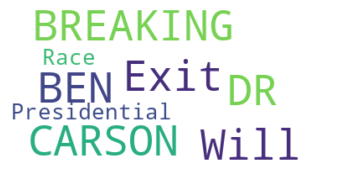

In [49]:
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
# Join titles for fake news articles for creating word cloud
wordcloud_titles = " ".join(entry for entry in fake_news_df_reduced.title)

In [54]:
# Define a few extra stopwords and also add in the default list
stop_words = ['s', 'p', 'm', 'u'] + list(STOPWORDS)

In [55]:
# Set specifics of the word cloud
wordcloud = WordCloud(max_font_size=60, min_font_size=12, max_words=70, stopwords=stop_words, background_color="white").generate(wordcloud_titles)

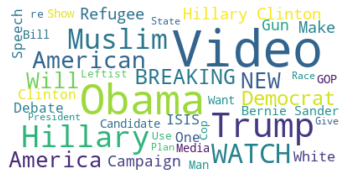

In [56]:
# Plot word cloud and save to the repo
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

fake_cloud = os.path.join("Images", "fake_news_cloud")
plt.savefig(fake_cloud)

plt.show()

True News Titles Word Cloud

In [57]:
true_news_for_cloud = all_df[all_df.news_type == 'true']
true_news_for_cloud

,type,news_type,title,text,subject,date
22842,1,true,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017"
22843,1,true,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017"
22844,1,true,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017"
22845,1,true,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017"
22846,1,true,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017"
...,...,...,...,...,...,...
44225,1,true,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,worldnews,"August 22, 2017"
44226,1,true,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017"
44227,1,true,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017"
44228,1,true,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017"


In [58]:
# Want to reduce to only 500 rows
true_news_df_reduced = true_news_for_cloud[(true_news_for_cloud.index >= 28000) & (true_news_for_cloud.index < 28500)]
true_news_df_reduced

,type,news_type,title,text,subject,date
28000,1,true,U.S. Attorney General Sessions to hold a news ...,U.S. Attorney General Jeff Sessions will hold ...,politicsNews,"March 2, 2017"
28001,1,true,Trump says has 'total confidence' in Attorney ...,President Donald Trump told reporters on Thurs...,politicsNews,"March 2, 2017"
28002,1,true,U.S. House Judiciary Democrats ask FBI to inve...,Democratic members of the House Judiciary Comm...,politicsNews,"March 2, 2017"
28003,1,true,House Democratic leader calls for Sessions' 'r...,House of Representatives Democratic leader Nan...,politicsNews,"March 2, 2017"
28004,1,true,U.S. House speaker: No reason for Sessions rec...,U.S. House of Representatives Speaker Paul Rya...,politicsNews,"March 2, 2017"
...,...,...,...,...,...,...
28495,1,true,"Trump administration tightens Iran sanctions, ...",The Trump administration on Friday imposed san...,politicsNews,"February 2, 2017"
28496,1,true,Over 9.2 million sign for Obamacare amid Trump...,More than 9.2 million U.S. consumers signed up...,politicsNews,"February 3, 2017"
28497,1,true,Trump to meet with airline CEOs on Thursday: W...,U.S. President Donald Trump will meet with the...,politicsNews,"February 4, 2017"
28498,1,true,Seattle judge grants nationwide temporary rest...,A U.S. federal judge in Seattle on Friday gran...,politicsNews,"February 4, 2017"


In [59]:
# Join titles for true news articles for creating word cloud
wordcloud_titles_true = " ".join(entry for entry in true_news_df_reduced.title)

In [60]:
# Set specifics of the word cloud
wordcloud_true = WordCloud(max_font_size=50, min_font_size=12, max_words=80, stopwords=stop_words, background_color="white").generate(wordcloud_titles_true)

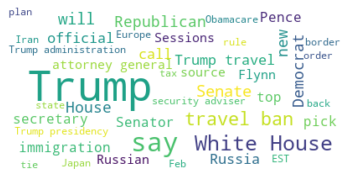

In [61]:
# Plot word cloud and save to the repo
true_cloud = plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")

true_cloud = os.path.join("Images", "true_news_cloud")
plt.savefig(true_cloud)

plt.show()